# Complete Guide to Chonkie Chunkers

## Master All 9 Chunking Strategies for RAG Applications

Welcome to this comprehensive tutorial on Chonkie - the lightweight, high-performance chunking library for Retrieval-Augmented Generation (RAG) systems!

### What You'll Learn

- **9 Different Chunking Strategies**: From basic token splitting to advanced LLM-powered chunking
- **Google Gemini Integration**: Using Gemini embeddings for semantic chunking
- **Practical Examples**: Real-world applications with technical docs and research papers
- **Performance Comparisons**: Side-by-side analysis of all chunkers
- **Best Practices**: How to choose the right chunker for your use case

### Tutorial Structure (2-2.5 hours)

1. Introduction & Setup (15 min)
2. Foundation Chunkers (20 min) - Token, Sentence, Recursive
3. Specialized Chunkers (20 min) - Table, Code
4. Semantic Chunkers (25 min) - Semantic, Late, Neural
5. Advanced Chunker (15 min) - Slumber (LLM-powered)
6. Comparative Analysis (15 min)
7. Best Practices (10 min)
8. Exercises & Next Steps (5 min)

Let's dive in!

## Section 1: Introduction & Setup

### 1.1 What is Chonkie?

Chonkie is a production-ready text chunking library designed specifically for RAG applications. It provides:

- **9 specialized chunkers** for different document types
- **Local processing** - your data never leaves your infrastructure
- **High performance** - optimized for speed and efficiency
- **Thread-safe** - suitable for concurrent processing
- **Flexible embeddings** - works with OpenAI, Gemini, Sentence Transformers, and more

### Why Chunking Matters

In RAG systems, chunking directly impacts:
- **Retrieval Quality**: Better chunks = more relevant context
- **Embedding Quality**: Semantic coherence improves embeddings
- **Generation Accuracy**: Relevant context leads to better answers
- **System Performance**: Efficient chunking reduces latency

In [1]:
# 1.2 Installation Verification
import sys
print(f"Python version: {sys.version}")

try:
    import chonkie
    print(f"Chonkie version: {chonkie.__version__}")
except ImportError:
    print("ERROR: Chonkie not installed. Please run: pip install -r requirements.txt")
    
# Import required libraries
from dotenv import load_dotenv
import os
import time
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from typing import List, Dict

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("\nAll required libraries loaded successfully!")

Python version: 3.12.9 (main, Mar 17 2025, 21:36:21) [Clang 20.1.0 ]
Chonkie version: 1.5.0

All required libraries loaded successfully!


In [2]:
# 1.3 Load Environment Variables
load_dotenv()

GEMINI_API_KEY = os.getenv("GEMINI_API_KEY")

if not GEMINI_API_KEY or GEMINI_API_KEY == "your_api_key_here":
    print("WARNING: Gemini API key not configured!")
    print("Please set your GEMINI_API_KEY in the .env file")
    print("Get your key from: https://makersuite.google.com/app/apikey")
else:
    print("Gemini API key loaded successfully!")

Gemini API key loaded successfully!


In [3]:
# 1.4 Setup Google Gemini Embeddings
from chonkie import GeminiEmbeddings

# Initialize Gemini embeddings
try:
    embeddings = GeminiEmbeddings(
        model="gemini-embedding-001",
        api_key=GEMINI_API_KEY,
        task_type="SEMANTIC_SIMILARITY"
    )
    
    # Test embeddings
    test_text = "Hello, this is a test embedding"
    test_vector = embeddings.embed(test_text)
    
    print(f"Embedding dimension: {len(test_vector)}")
    print(f"Sample values: {test_vector[:5]}")
    print("\nGemini embeddings configured successfully!")
except Exception as e:
    print(f"Error setting up Gemini embeddings: {e}")
    print("Continuing with tutorial - semantic chunkers will not work without valid API key")

/Users/sourangshupal/Downloads/chonkie-chunkers-tutorials/.venv/lib/python3.12/site-packages/chonkie/embeddings/gemini.py:78: UserWarning: Model gemini-embedding-001 not in known models list. Using default model 'gemini-embedding-exp-03-07' with dimension 3072 and max tokens 8192.
  warnings.warn(


Embedding dimension: 3072
Sample values: [-0.03420706  0.01485292 -0.00731989 -0.0750412  -0.01339855]

Gemini embeddings configured successfully!


In [4]:
# 1.5 Load Sample Data
# Load technical documentation
with open("../data/sample_technical_doc.txt", "r") as f:
    technical_doc_text = f.read()

# Load research paper
with open("../data/sample_research_paper.txt", "r") as f:
    research_paper_text = f.read()

# Load code sample
with open("../data/sample_code.py", "r") as f:
    code_text = f.read()

# Load table sample
with open("../data/sample_table.md", "r") as f:
    table_text = f.read()

print(f"Technical Doc: {len(technical_doc_text):,} characters")
print(f"Research Paper: {len(research_paper_text):,} characters")
print(f"Code Sample: {len(code_text):,} characters")
print(f"Table Sample: {len(table_text):,} characters")

# Display sample
print("\n--- Technical Doc Preview ---")
print(technical_doc_text[:300] + "...")

Technical Doc: 7,473 characters
Research Paper: 14,482 characters
Code Sample: 12,943 characters
Table Sample: 6,159 characters

--- Technical Doc Preview ---
# Chonkie API Documentation

## Overview

Chonkie is a lightweight, high-performance library for chunking text in Retrieval-Augmented Generation (RAG) applications. It provides a comprehensive suite of chunking algorithms designed for different document types and use cases.

## Installation

### Bas...


In [5]:
# 1.6 Helper Functions

def display_chunks(chunks, max_display=3, show_metadata=True):
    """Display chunks with metadata."""
    print(f"\nTotal chunks: {len(chunks)}")
    print("="*80)
    
    for i, chunk in enumerate(chunks[:max_display]):
        print(f"\nChunk {i+1}:")
        print(f"Text: {chunk.text[:200]}...")
        if show_metadata and hasattr(chunk, 'token_count'):
            print(f"Token count: {chunk.token_count}")
        if show_metadata and hasattr(chunk, 'start_char'):
            print(f"Position: {chunk.start_char} - {chunk.end_char}")
        print("-" * 80)
    
    if len(chunks) > max_display:
        print(f"\n... and {len(chunks) - max_display} more chunks")


def visualize_chunk_sizes(chunks, title="Chunk Size Distribution"):
    """Create bar chart of chunk token counts."""
    token_counts = [chunk.token_count if hasattr(chunk, 'token_count') else len(chunk.text) 
                   for chunk in chunks]
    
    plt.figure(figsize=(12, 5))
    
    # Histogram
    plt.subplot(1, 2, 1)
    plt.hist(token_counts, bins=20, edgecolor='black', alpha=0.7)
    plt.xlabel('Token Count')
    plt.ylabel('Frequency')
    plt.title(f'{title}\nDistribution')
    plt.axvline(np.mean(token_counts), color='red', linestyle='--', label=f'Mean: {np.mean(token_counts):.0f}')
    plt.legend()
    
    # Box plot
    plt.subplot(1, 2, 2)
    plt.boxplot(token_counts, vert=True)
    plt.ylabel('Token Count')
    plt.title(f'{title}\nBox Plot')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nStatistics:")
    print(f"  Mean: {np.mean(token_counts):.1f}")
    print(f"  Median: {np.median(token_counts):.1f}")
    print(f"  Std Dev: {np.std(token_counts):.1f}")
    print(f"  Min: {min(token_counts)}")
    print(f"  Max: {max(token_counts)}")


def compare_chunkers(text, chunkers_dict, sample_size=1000):
    """Compare multiple chunkers on same text."""
    results = {}
    sample_text = text[:sample_size] if len(text) > sample_size else text
    
    for name, chunker in chunkers_dict.items():
        start_time = time.time()
        chunks = chunker.chunk(sample_text)
        elapsed = time.time() - start_time
        
        token_counts = [chunk.token_count if hasattr(chunk, 'token_count') else len(chunk.text) 
                       for chunk in chunks]
        
        results[name] = {
            'num_chunks': len(chunks),
            'avg_size': np.mean(token_counts),
            'std_dev': np.std(token_counts),
            'time': elapsed
        }
    
    df = pd.DataFrame(results).T
    return df

print("Helper functions loaded!")

Helper functions loaded!


## Section 2: Foundation Chunkers

These are the basic, high-performance chunkers that work well for most use cases.

### 2.1 TokenChunker - Fixed-Size Token Windows

**Best for:** General purpose, consistent chunk sizes, high-throughput applications

**How it works:** Splits text into fixed-size token chunks with configurable overlap

**Pros:**
- Very fast (12,000 chunks/sec)
- Predictable chunk sizes
- No external dependencies
- Works with any text

**Cons:**
- May break sentences mid-thought
- No semantic awareness
- Can fragment important context

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]


Total chunks: 6

Chunk 1:
Text: # Chonkie API Documentation

## Overview

Chonkie is a lightweight, high-performance library for chunking text in Retrieval-Augmented Generation (RAG) applications. It provides a comprehensive suite o...
Token count: 512
--------------------------------------------------------------------------------

Chunk 2:
Text: "]
batch_chunks = chunker.chunk_batch(texts)
```

### TokenChunker API

The TokenChunker splits text into fixed-size token chunks with configurable overlap.

**Parameters:**
- `tokenizer` (Tokenizer):...
Token count: 512
--------------------------------------------------------------------------------

Chunk 3:
Text:  limits.

**Parameters:**
- `tokenizer` (Tokenizer): Tokenizer instance
- `chunk_size` (int): Maximum tokens per chunk (default: 512)
- `min_sentences_per_chunk` (int): Minimum sentences per chunk (de...
Token count: 512
--------------------------------------------------------------------------------

... and 3 more chunks


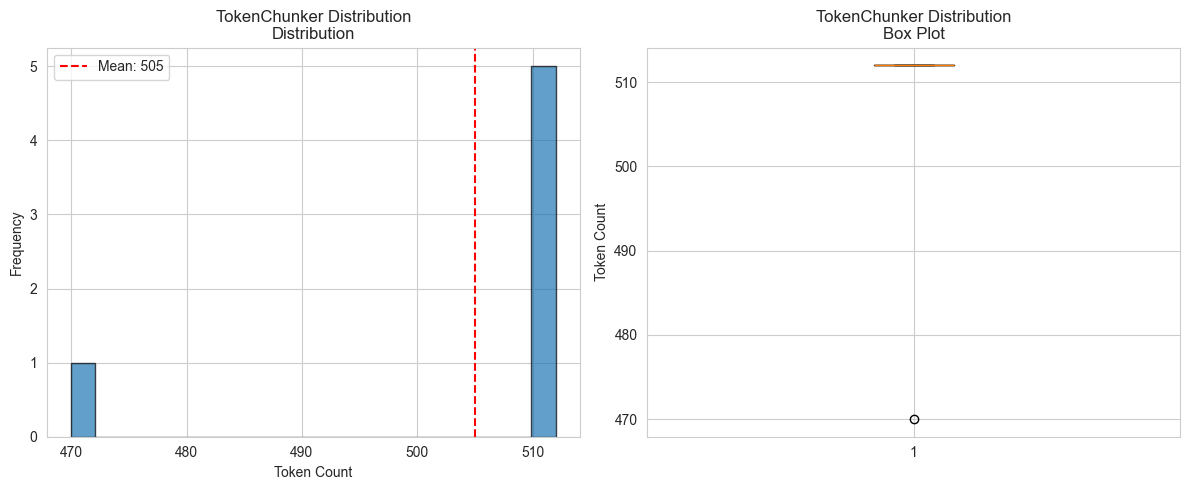


Statistics:
  Mean: 505.0
  Median: 512.0
  Std Dev: 15.7
  Min: 470
  Max: 512


In [6]:
from chonkie import TokenChunker
from tokenizers import Tokenizer

# Initialize tokenizer
tokenizer = Tokenizer.from_pretrained("gpt2")

# Create TokenChunker
token_chunker = TokenChunker(
    tokenizer=tokenizer,
    chunk_size=512,      # Max tokens per chunk
    chunk_overlap=128    # Overlapping tokens between chunks
)

# Chunk technical documentation
token_chunks = token_chunker.chunk(technical_doc_text)

# Display results
display_chunks(token_chunks)
visualize_chunk_sizes(token_chunks, "TokenChunker Distribution")

#### Exercise: Experiment with Parameters

Try different chunk_size and chunk_overlap values:
- chunk_size: 256, 512, 1024
- chunk_overlap: 0, 64, 128, 256

Observe how they affect the number and size of chunks!

In [ ]:
# Your experimentation here
# Example:
# token_chunker_small = TokenChunker(tokenizer=tokenizer, chunk_size=256, chunk_overlap=64)
# small_chunks = token_chunker_small.chunk(technical_doc_text[:2000])
# display_chunks(small_chunks)

### 2.2 SentenceChunker - Sentence Boundary Preservation

**Best for:** Q&A systems, semantic search, preserving complete thoughts

**How it works:** Accumulates complete sentences until reaching token limit

**Pros:**
- Preserves sentence integrity
- Better for question answering
- Still quite fast (8,500 chunks/sec)

**Cons:**
- Variable chunk sizes
- May group unrelated sentences
- Depends on sentence detection accuracy


Total chunks: 6

Chunk 1:
Text: Semantic Chunking Strategies for Retrieval-Augmented Generation Systems

Abstract

Retrieval-Augmented Generation (RAG) systems have emerged as a powerful paradigm for enhancing large language models ...
Token count: 472
--------------------------------------------------------------------------------

Chunk 2:
Text: Neural approaches employ fine-tuned models to detect discourse-level shifts, while late chunking techniques defer segmentation until after contextualized embedding generation.

This paper makes the fo...
Token count: 489
--------------------------------------------------------------------------------

Chunk 3:
Text: Hierarchical chunking maintains multiple granularities simultaneously. However, these approaches have not been systematically compared across diverse document types and retrieval scenarios.

3. Method...
Token count: 479
--------------------------------------------------------------------------------

... and 3 more chunks


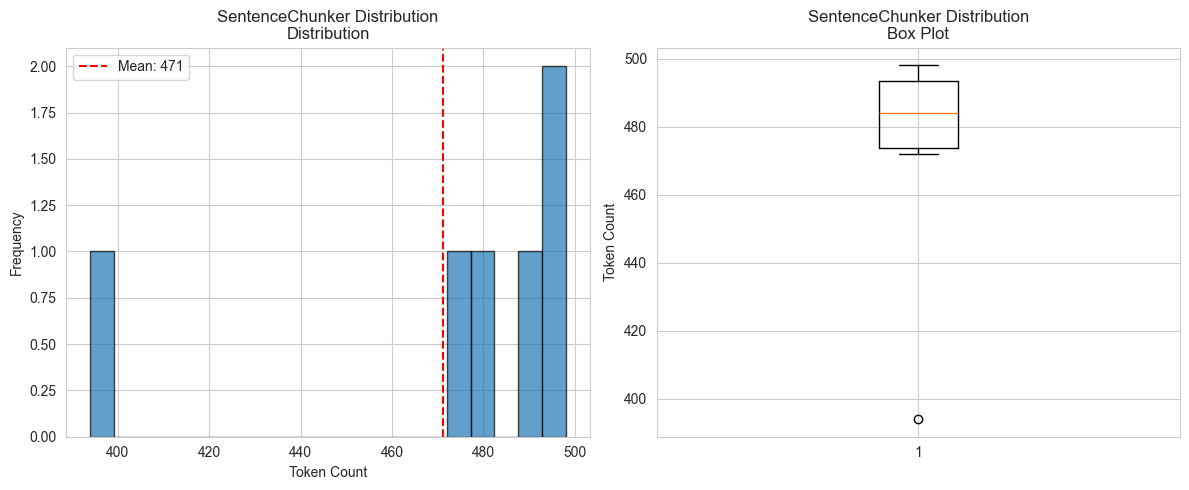


Statistics:
  Mean: 471.2
  Median: 484.0
  Std Dev: 35.6
  Min: 394
  Max: 498


In [7]:
from chonkie import SentenceChunker

# Create SentenceChunker
sentence_chunker = SentenceChunker(
    tokenizer=tokenizer,
    chunk_size=512,
    min_sentences_per_chunk=2  # Ensure at least 2 sentences per chunk
)

# Chunk research paper
sentence_chunks = sentence_chunker.chunk(research_paper_text)

display_chunks(sentence_chunks)
visualize_chunk_sizes(sentence_chunks, "SentenceChunker Distribution")

In [8]:
# Compare TokenChunker vs SentenceChunker
comparison_text = research_paper_text[:5000]

token_chunks_comp = token_chunker.chunk(comparison_text)
sentence_chunks_comp = sentence_chunker.chunk(comparison_text)

print("Comparison on same text:")
print(f"\nTokenChunker: {len(token_chunks_comp)} chunks")
print(f"SentenceChunker: {len(sentence_chunks_comp)} chunks")

print("\n--- TokenChunker First Chunk ---")
print(token_chunks_comp[0].text[:300])

print("\n--- SentenceChunker First Chunk ---")
print(sentence_chunks_comp[0].text[:300])

Comparison on same text:

TokenChunker: 2 chunks
SentenceChunker: 2 chunks

--- TokenChunker First Chunk ---
Semantic Chunking Strategies for Retrieval-Augmented Generation Systems

Abstract

Retrieval-Augmented Generation (RAG) systems have emerged as a powerful paradigm for enhancing large language models with external knowledge. A critical component of RAG systems is text chunking - the process of segme

--- SentenceChunker First Chunk ---
Semantic Chunking Strategies for Retrieval-Augmented Generation Systems

Abstract

Retrieval-Augmented Generation (RAG) systems have emerged as a powerful paradigm for enhancing large language models with external knowledge. A critical component of RAG systems is text chunking - the process of segme


### 2.3 RecursiveChunker - Hierarchical Splitting

**Best for:** Markdown, structured documents, technical documentation

**How it works:** Uses hierarchy of separators (paragraphs → sentences → words)

**Pros:**
- Respects document structure
- Excellent for markdown
- Customizable separators
- Good balance of speed and quality

**Cons:**
- Less effective on unstructured text
- Requires well-formatted documents
- Performance depends on separator choice


Total chunks: 5

Chunk 1:
Text: # Chonkie API Documentation

## Overview

Chonkie is a lightweight, high-performance library for chunking text in Retrieval-Augmented Generation (RAG) applications. It provides a comprehensive suite o...
Token count: 503
--------------------------------------------------------------------------------

Chunk 2:
Text: 
**Methods:**
- `chunk(text: str) -> List[Chunk]`: Chunk a single text
- `chunk_batch(texts: List[str]) -> List[List[Chunk]]`: Chunk multiple texts
- `__call__(text: str) -> List[Chunk]`: Direct calli...
Token count: 511
--------------------------------------------------------------------------------

Chunk 3:
Text: - `chunk_overlap` (int): Overlapping tokens (default: 128)
- `separators` (List[str]): Delimiters in priority order (default: ["\n\n", "\n", ". ", " "])

**Use Cases:**
- Markdown documents
- Structur...
Token count: 511
--------------------------------------------------------------------------------

... and 2 more chunks


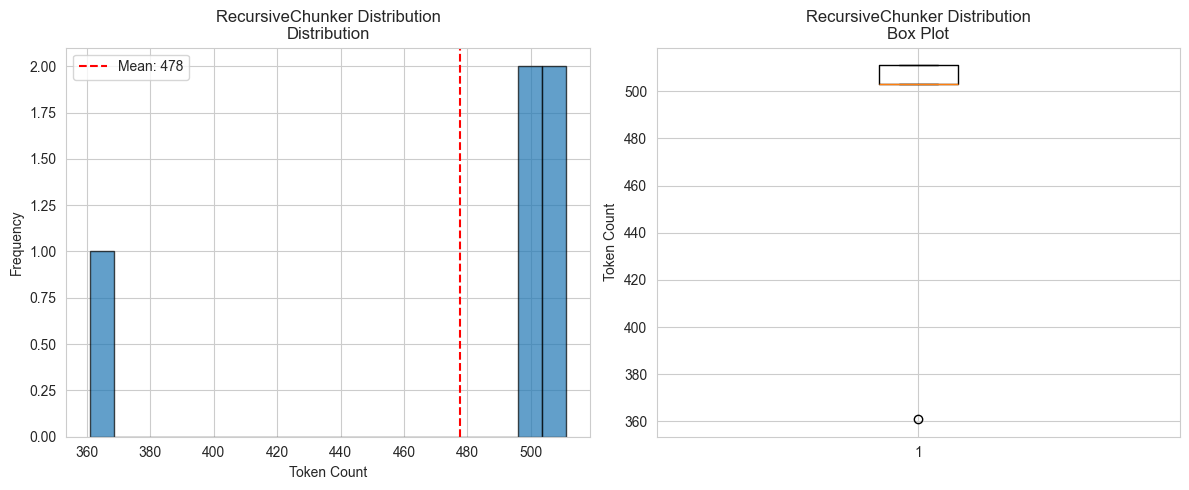


Statistics:
  Mean: 477.8
  Median: 503.0
  Std Dev: 58.5
  Min: 361
  Max: 511


In [11]:
from chonkie import RecursiveChunker

# Create RecursiveChunker
recursive_chunker = RecursiveChunker(
    tokenizer=tokenizer,
    chunk_size=512
    #separators=["\n\n", "\n", ". ", " ", ""]  # Priority order
)

# Chunk technical documentation (has good structure)
recursive_chunks = recursive_chunker(technical_doc_text)  # Can also use __call__

display_chunks(recursive_chunks)
visualize_chunk_sizes(recursive_chunks, "RecursiveChunker Distribution")

In [12]:
# Demonstrate hierarchy preservation
print("First chunk shows hierarchy preservation:")
print(recursive_chunks[0].text)

First chunk shows hierarchy preservation:
# Chonkie API Documentation

## Overview

Chonkie is a lightweight, high-performance library for chunking text in Retrieval-Augmented Generation (RAG) applications. It provides a comprehensive suite of chunking algorithms designed for different document types and use cases.

## Installation

### Basic Installation

To install Chonkie with default chunkers:

```bash
pip install chonkie
```

### Installation Tiers

Chonkie offers three installation tiers to match your needs:

**Default Tier:**
Includes TokenChunker, SentenceChunker, RecursiveChunker, and TableChunker. Perfect for most use cases.

```bash
pip install chonkie
```

**Semantic Tier:**
Adds embedding-based chunkers (SemanticChunker, LateChunker, NeuralChunker):

```bash
pip install chonkie[semantic]
```

**All Features:**
Install everything, including code chunking and LLM-powered chunking:

```bash
pip install chonkie[all]
```

## Quick Start

### Basic Usage

All Chonkie chunkers fo

## Section 3: Specialized Chunkers

These chunkers are optimized for specific content types.

### 3.1 TableChunker - Tabular Data Handling

**Best for:** Markdown tables, CSV data, structured tabular content

**How it works:** Splits tables by rows while preserving headers

**Pros:**
- Preserves table structure
- Maintains header context
- Handles large tables efficiently

**Cons:**
- Only works with tables
- Requires markdown format
- May create very large chunks for wide tables

In [13]:
from chonkie import TableChunker

# Create TableChunker
table_chunker = TableChunker(
    tokenizer=tokenizer,
    chunk_size=512
)

# Chunk table data
table_chunks = table_chunker.chunk(table_text)

print(f"Table split into {len(table_chunks)} chunks")
print("\nFirst chunk (with headers):")
print(table_chunks[0].text)

Table split into 5 chunks

First chunk (with headers):
# Chonkie Chunkers Comparison Table

## Performance Metrics Across Different Chunkers

| Chunker Name | Use Case | Processing Speed (chunks/sec) | Semantic Quality (0-100) | Memory Usage (MB) | Token Consistency | Best For | Computational Cost |
|---|---|---|---|---|---|---|---|
| TokenChunker | General purpose | 12000 | 61 | 50 | Very High | High-throughput applications, real-time systems | Very Low |
| SentenceChunker | Q&A systems | 8500 | 71 | 65 | High | Question answering, semantic search | Low |
| RecursiveChunker | Structured docs | 7200 | 76 | 80 | Medium | Markdown, technical documentation | Low |
| TableChunker | Tabular data | 5500 | 68 | 95 | Medium | Data tables, spreadsheet content | Low |
| SemanticChunker | Multi-topic docs | 450 | 78 | 350 | Low | Multi-topic documents, topical coherence | Medium |
| LateChunker | RAG retrieval | 180 | 82 | 800 | Low | Maximum retrieval recall | High |
| CodeChunker | Source code 

### 3.2 CodeChunker - Source Code Chunking

**Best for:** Source code, API documentation, code repositories

**How it works:** Uses Abstract Syntax Tree (AST) to chunk at logical boundaries

**Pros:**
- Preserves function/class boundaries
- Maintains code structure
- Language-aware chunking
- Excellent for code search

**Cons:**
- Only works with code
- Requires valid syntax
- Language-specific (Python, JavaScript, etc.)

In [14]:
from chonkie import CodeChunker

# Create CodeChunker
code_chunker = CodeChunker(
    language="python",
    tokenizer_or_token_counter=tokenizer,
    chunk_size=2048,
    include_nodes=True  # Include AST node information
)

# Chunk Python code
code_chunks = code_chunker.chunk(code_text)

print(f"Code split into {len(code_chunks)} chunks")
print("\n--- First Code Chunk ---")
print(code_chunks[0].text[:500])

# Show function boundaries
if hasattr(code_chunks[0], 'node_type'):
    print(f"\nNode type: {code_chunks[0].node_type}")

TypeError: CodeChunker.__init__() got an unexpected keyword argument 'tokenizer_or_token_counter'

## Section 4: Semantic/Embedding-Based Chunkers

These chunkers use embeddings to identify semantic boundaries.

### 4.1 SemanticChunker - Topic Boundary Detection

**Best for:** Multi-topic documents, preserving topical coherence

**How it works:** Uses embeddings to find topic boundaries based on semantic similarity

**Pros:**
- Excellent semantic coherence
- Natural topic boundaries
- Auto threshold detection
- 23% better retrieval than fixed-size

**Cons:**
- Requires embedding API
- Slower (450 chunks/sec)
- API costs
- Variable chunk sizes

In [ ]:
from chonkie import SemanticChunker

# Create SemanticChunker with Gemini embeddings
semantic_chunker = SemanticChunker(
    embedding_model=embeddings,  # Using our Gemini embeddings
    threshold="auto",  # Automatically determine threshold
    chunk_size=512,
    min_sentences=1
)

# Chunk research paper (has multiple topics)
semantic_chunks = semantic_chunker.chunk(research_paper_text)

display_chunks(semantic_chunks)
visualize_chunk_sizes(semantic_chunks, "SemanticChunker Distribution")

In [ ]:
# Show semantic similarity scores (if available)
for i, chunk in enumerate(semantic_chunks[:5]):
    print(f"\nChunk {i}: {len(chunk.text)} chars")
    if hasattr(chunk, 'similarity_score'):
        print(f"Similarity score: {chunk.similarity_score:.3f}")
    print(f"Preview: {chunk.text[:150]}...")

In [ ]:
# Compare automatic vs manual threshold
semantic_chunker_manual = SemanticChunker(
    embedding_model=embeddings,
    threshold=0.5,  # Manual threshold
    chunk_size=512,
    min_sentences=1
)

manual_chunks = semantic_chunker_manual.chunk(research_paper_text[:5000])

print(f"Auto threshold: {len(semantic_chunks)} chunks")
print(f"Manual threshold (0.5): {len(manual_chunks)} chunks")

### 4.2 LateChunker - Optimized for Retrieval

**Best for:** Maximizing retrieval recall in RAG systems

**How it works:** Generates document-level embeddings before chunking

**Pros:**
- Better retrieval recall
- Richer contextual embeddings
- Based on research

**Cons:**
- Slower (180 chunks/sec)
- Higher memory usage
- More expensive

In [ ]:
from chonkie import LateChunker

# Create LateChunker
late_chunker = LateChunker(
    embedding_model=embeddings,
    chunk_size=512,
    context_size=2048  # Document-level context window
)

# Chunk technical documentation
late_chunks = late_chunker.chunk(technical_doc_text)

display_chunks(late_chunks)
visualize_chunk_sizes(late_chunks, "LateChunker Distribution")

### 4.3 NeuralChunker - BERT-Based Semantic Shifts

**Best for:** Complex documents with subtle topic variations

**How it works:** Fine-tuned BERT model detects semantic boundaries

**Pros:**
- Detects subtle topic shifts
- No API required (local model)
- Learned representations
- Good for academic papers

**Cons:**
- Requires GPU for speed
- Slower (320 chunks/sec)
- Higher memory usage

In [ ]:
from chonkie import NeuralChunker

# Create NeuralChunker
neural_chunker = NeuralChunker(
    tokenizer=tokenizer,
    chunk_size=512,
    threshold=0.6  # Semantic shift threshold
)

# Chunk research paper
neural_chunks = neural_chunker.chunk(research_paper_text)

display_chunks(neural_chunks)
visualize_chunk_sizes(neural_chunks, "NeuralChunker Distribution")

## Section 5: Advanced Chunker - SlumberChunker

### LLM-Powered Agentic Chunking

**Best for:** Highest quality needs, books, research papers

**How it works:** Uses LLM to intelligently determine chunk boundaries

**Pros:**
- Highest quality (92% recall@5)
- Most intelligent boundaries
- Understands context deeply

**Cons:**
- Very slow (8 chunks/sec)
- Expensive ($45 per 1M chunks)
- Requires LLM API
- Not suitable for real-time

In [ ]:
from chonkie import SlumberChunker

# Create SlumberChunker
slumber_chunker = SlumberChunker(
    model="gemini-pro",  # Can use Gemini
    api_key=GEMINI_API_KEY,
    chunk_size=512,
    strategy="intelligent"  # LLM decides boundaries
)

# Warning: This is slow and costs API credits!
# Using only first 5000 characters
slumber_chunks = slumber_chunker.chunk(research_paper_text[:5000])

display_chunks(slumber_chunks)

print("\nNote: SlumberChunker is 140x slower than TokenChunker")
print("Use for highest quality needs where cost and latency are acceptable")

## Section 6: Comparative Analysis

Let's compare all chunkers side-by-side!

In [ ]:
# 6.1 Create all chunkers
chunkers = {
    "Token": token_chunker,
    "Sentence": sentence_chunker,
    "Recursive": recursive_chunker,
    "Semantic": semantic_chunker,
    "Neural": neural_chunker,
}

# Compare on sample text
sample_text = research_paper_text[:10000]
results_df = compare_chunkers(sample_text, chunkers)

print("\nComparative Analysis:")
print("=" * 80)
print(results_df.round(3))

In [ ]:
# 6.2 Visualize comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Number of chunks
axes[0, 0].bar(results_df.index, results_df['num_chunks'])
axes[0, 0].set_title('Number of Chunks')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=45)

# Average chunk size
axes[0, 1].bar(results_df.index, results_df['avg_size'])
axes[0, 1].set_title('Average Chunk Size')
axes[0, 1].set_ylabel('Tokens')
axes[0, 1].tick_params(axis='x', rotation=45)

# Size variance
axes[1, 0].bar(results_df.index, results_df['std_dev'])
axes[1, 0].set_title('Size Variance (Std Dev)')
axes[1, 0].set_ylabel('Tokens')
axes[1, 0].tick_params(axis='x', rotation=45)

# Processing time
axes[1, 1].bar(results_df.index, results_df['time'] * 1000)
axes[1, 1].set_title('Processing Time')
axes[1, 1].set_ylabel('Milliseconds')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Section 7: Best Practices & Use Cases

### 7.1 Chunker Selection Guide

In [ ]:
# Decision matrix
selection_guide = pd.DataFrame({
    'Use Case': [
        'Real-time high-throughput',
        'Question answering',
        'Markdown/structured docs',
        'Source code',
        'Data tables',
        'Multi-topic documents',
        'Maximum retrieval quality',
        'Complex academic papers',
        'Books/premium content'
    ],
    'Recommended Chunker': [
        'TokenChunker',
        'SentenceChunker',
        'RecursiveChunker',
        'CodeChunker',
        'TableChunker',
        'SemanticChunker',
        'LateChunker',
        'NeuralChunker',
        'SlumberChunker'
    ],
    'Alternative': [
        'SentenceChunker',
        'SemanticChunker',
        'SentenceChunker',
        'RecursiveChunker',
        'RecursiveChunker',
        'NeuralChunker',
        'SemanticChunker',
        'SemanticChunker',
        'SemanticChunker'
    ]
})

print("\nChunker Selection Guide:")
print("=" * 80)
print(selection_guide.to_string(index=False))

### 7.2 Common Patterns

#### Batch Processing

In [ ]:
# Batch processing example
documents = [
    technical_doc_text[:2000],
    research_paper_text[:2000],
    "Another document here..."
]

# Process all documents at once
batch_chunks = token_chunker.chunk_batch(documents)

print(f"Processed {len(documents)} documents")
for i, chunks in enumerate(batch_chunks):
    print(f"Document {i+1}: {len(chunks)} chunks")

#### Error Handling

In [ ]:
# Robust chunking with fallback
def safe_chunk(text, preferred_chunker, fallback_chunker):
    try:
        return preferred_chunker.chunk(text)
    except Exception as e:
        print(f"Error with preferred chunker: {e}")
        print("Falling back to simpler chunker")
        return fallback_chunker.chunk(text)

# Example usage
chunks = safe_chunk(
    technical_doc_text,
    preferred_chunker=semantic_chunker,
    fallback_chunker=token_chunker
)

print(f"Successfully chunked: {len(chunks)} chunks")

### 7.3 Integration with RAG Pipeline

Simple example of chunking → embedding → retrieval

In [ ]:
# Simple RAG pipeline
def simple_rag_pipeline(documents, query, chunker, embedding_model, top_k=3):
    # Step 1: Chunk documents
    all_chunks = []
    for doc in documents:
        chunks = chunker.chunk(doc)
        all_chunks.extend(chunks)
    
    print(f"Created {len(all_chunks)} chunks from {len(documents)} documents")
    
    # Step 2: Embed chunks
    chunk_texts = [chunk.text for chunk in all_chunks]
    chunk_embeddings = embedding_model.embed_batch(chunk_texts)
    
    # Step 3: Embed query
    query_embedding = embedding_model.embed(query)
    
    # Step 4: Find most similar chunks
    similarities = []
    for i, chunk_emb in enumerate(chunk_embeddings):
        sim = np.dot(query_embedding, chunk_emb) / (
            np.linalg.norm(query_embedding) * np.linalg.norm(chunk_emb)
        )
        similarities.append((i, sim))
    
    # Sort by similarity
    similarities.sort(key=lambda x: x[1], reverse=True)
    
    # Return top-k chunks
    top_chunks = [all_chunks[i] for i, _ in similarities[:top_k]]
    top_scores = [score for _, score in similarities[:top_k]]
    
    return top_chunks, top_scores

# Example query
query = "What are the best practices for chunking in RAG systems?"
docs = [technical_doc_text, research_paper_text]

retrieved_chunks, scores = simple_rag_pipeline(
    docs, query, semantic_chunker, embeddings
)

print(f"\nQuery: {query}")
print("\nTop 3 Retrieved Chunks:")
for i, (chunk, score) in enumerate(zip(retrieved_chunks, scores)):
    print(f"\n{i+1}. Similarity: {score:.3f}")
    print(f"Text: {chunk.text[:200]}...")

## Section 8: Exercises & Next Steps

### Exercises

1. **Chunk Your Own Document**: Upload a document and try 3 different chunkers
2. **Optimize Threshold**: Find the optimal threshold for SemanticChunker on your data
3. **Speed Comparison**: Time all chunkers on a large document
4. **Build Mini-RAG**: Create a simple retrieval system with your favorite chunker

In [ ]:
# Exercise 1: Your code here
# Load your own document and experiment!

In [ ]:
# Exercise 2: Find optimal threshold
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7, "auto"]
test_text = research_paper_text[:5000]

# Your code here to test different thresholds

In [ ]:
# Exercise 3: Speed comparison
# Time all chunkers on the full research paper

### Key Takeaways

1. **No one-size-fits-all**: Choose chunker based on your use case
2. **Trade-offs matter**: Speed vs quality, consistency vs semantics
3. **Start simple**: TokenChunker or SentenceChunker for most cases
4. **Upgrade for quality**: Semantic chunkers when retrieval quality matters
5. **Test with your data**: What works for others may not work for you

### Resources

- [Chonkie Documentation](https://docs.chonkie.ai/)
- [Chonkie GitHub](https://github.com/chonkie-inc/chonkie)
- [Google Gemini API](https://ai.google.dev/gemini-api/docs)

### Next Steps

1. Experiment with different embeddings (OpenAI, Sentence Transformers)
2. Integrate with vector databases (Chroma, Pinecone, Weaviate)
3. Build a complete RAG application
4. Optimize for your specific domain

Thank you for completing this tutorial! Happy chunking!